https://www.youtube.com/watch?v=kCc8FmEb1nY

In [28]:
# !curl https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt > datasets/shakespeare.txt
# !curl https://www.gutenberg.org/cache/epub/5186/pg5186.txt > datasets/kalevala-en.txt
!curl https://www.gutenberg.org/cache/epub/7000/pg7000.txt > datasets/kalevala-fi.txt

In [58]:
with open('datasets/kalevala-fi.txt') as f:
    text = f.read()[2329:]
    
print(len(text))
print(text[:1000])

610233
  Ensimmäinen runo


  Mieleni minun tekevi,
  aivoni ajattelevi
  lähteäni laulamahan,
  saa'ani sanelemahan,
  sukuvirttä suoltamahan,
  lajivirttä laulamahan.
  Sanat suussani sulavat,
  puhe'et putoelevat,
  kielelleni kerkiävät,
  hampahilleni hajoovat.
  Veli kulta, veikkoseni,
  kaunis kasvinkumppalini!
  Lähe nyt kanssa laulamahan,
  saa kera sanelemahan
  yhtehen yhyttyämme,
  kahta'alta käytyämme!
  Harvoin yhtehen yhymme,
  saamme toinen toisihimme
  näillä raukoilla rajoilla,
  poloisilla Pohjan mailla.
  Lyökämme käsi kätehen,
  sormet sormien lomahan,
  lauloaksemme hyviä,
  parahia pannaksemme,
  kuulla noien kultaisien,
  tietä mielitehtoisien,
  nuorisossa nousevassa,
  kansassa kasuavassa:
  noita saamia sanoja,
  virsiä virittämiä
  vyöltä vanhan Väinämöisen,
  alta ahjon Ilmarisen,
  päästä kalvan Kaukomielen,
  Joukahaisen jousen tiestä,
  Pohjan peltojen periltä,
  Kalevalan kankahilta.
  Niit' ennen isoni lauloi
  kirvesvartta vuollessansa;
  niitä äitini 

In [59]:
chars = sorted(set(text))

stoi = {c: i for i, c in enumerate(chars)}
itos = {i: c for i, c in enumerate(chars)}
encode = lambda s: [stoi[c] for c in s]
decode = lambda l: ''.join(itos[i] for i in l)

print(chars)
print(enc := list(encode('Väinämöinen')))
print(decode(enc))

['\n', ' ', '!', '"', '$', '%', "'", '(', ')', '*', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'Ä', 'ä', 'ö']
[49, 80, 61, 66, 80, 65, 81, 61, 66, 57, 66]
Väinämöinen


In [60]:
import torch

data = torch.tensor(encode(text), dtype=torch.long)
print(data.shape, data.dtype)
print(data[:1000])

torch.Size([610233]) torch.int64
tensor([ 1,  1, 32, 66, 71, 61, 65, 65, 80, 61, 66, 57, 66,  1, 70, 73, 66, 67,
         0,  0,  0,  1,  1, 40, 61, 57, 64, 57, 66, 61,  1, 65, 61, 66, 73, 66,
         1, 72, 57, 63, 57, 74, 61, 10,  0,  1,  1, 53, 61, 74, 67, 66, 61,  1,
        53, 62, 53, 72, 72, 57, 64, 57, 74, 61,  0,  1,  1, 64, 80, 60, 72, 57,
        80, 66, 61,  1, 64, 53, 73, 64, 53, 65, 53, 60, 53, 66, 10,  0,  1,  1,
        71, 53, 53,  6, 53, 66, 61,  1, 71, 53, 66, 57, 64, 57, 65, 53, 60, 53,
        66, 10,  0,  1,  1, 71, 73, 63, 73, 74, 61, 70, 72, 72, 80,  1, 71, 73,
        67, 64, 72, 53, 65, 53, 60, 53, 66, 10,  0,  1,  1, 64, 53, 62, 61, 74,
        61, 70, 72, 72, 80,  1, 64, 53, 73, 64, 53, 65, 53, 60, 53, 66, 12,  0,
         1,  1, 46, 53, 66, 53, 72,  1, 71, 73, 73, 71, 71, 53, 66, 61,  1, 71,
        73, 64, 53, 74, 53, 72, 10,  0,  1,  1, 68, 73, 60, 57,  6, 57, 72,  1,
        68, 73, 72, 67, 57, 64, 57, 74, 53, 72, 10,  0,  1,  1, 63, 61, 57, 64,
       

In [61]:
n = int(0.9 * len(data))
train_data = data[:n]
val_data = data[n:]

In [62]:
block_size = 8

train_data[:block_size+1]

tensor([ 1,  1, 32, 66, 71, 61, 65, 65, 80])

In [63]:
x = train_data[:block_size]
y = train_data[1:block_size+1]
for t in range(block_size):
    context = x[:t+1]
    target = y[t]
    print(f'{context} -> {target}')

tensor([1]) -> 1
tensor([1, 1]) -> 32
tensor([ 1,  1, 32]) -> 66
tensor([ 1,  1, 32, 66]) -> 71
tensor([ 1,  1, 32, 66, 71]) -> 61
tensor([ 1,  1, 32, 66, 71, 61]) -> 65
tensor([ 1,  1, 32, 66, 71, 61, 65]) -> 65
tensor([ 1,  1, 32, 66, 71, 61, 65, 65]) -> 80


In [69]:
torch.manual_seed(123)

batch_size = 4
block_size = 8

def get_batch(split):
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    return x, y

xb, yb = get_batch('train')
print(f'''
{xb.shape=}
{xb=}
 
{yb.shape=}
{yb=}
''')

for b in range(batch_size):
    for t in range(block_size):
        context = xb[b, :t+1]
        target = yb[b, t]
        print(f'{context.tolist()} -> {target}')


xb.shape=torch.Size([4, 8])
xb=tensor([[ 0,  1,  1, 57, 61, 63, 80, 68],
        [ 1, 65, 53, 72, 63, 53, 64, 64],
        [ 0,  1,  1, 68, 53, 64, 53, 71],
        [ 1, 71, 57, 68, 68, 67,  1, 36]])
 
yb.shape=torch.Size([4, 8])
yb=tensor([[ 1,  1, 57, 61, 63, 80, 68, 80],
        [65, 53, 72, 63, 53, 64, 64, 53],
        [ 1,  1, 68, 53, 64, 53, 71, 57],
        [71, 57, 68, 68, 67,  1, 36, 64]])

[0] -> 1
[0, 1] -> 1
[0, 1, 1] -> 57
[0, 1, 1, 57] -> 61
[0, 1, 1, 57, 61] -> 63
[0, 1, 1, 57, 61, 63] -> 80
[0, 1, 1, 57, 61, 63, 80] -> 68
[0, 1, 1, 57, 61, 63, 80, 68] -> 80
[1] -> 65
[1, 65] -> 53
[1, 65, 53] -> 72
[1, 65, 53, 72] -> 63
[1, 65, 53, 72, 63] -> 53
[1, 65, 53, 72, 63, 53] -> 64
[1, 65, 53, 72, 63, 53, 64] -> 64
[1, 65, 53, 72, 63, 53, 64, 64] -> 53
[0] -> 1
[0, 1] -> 1
[0, 1, 1] -> 68
[0, 1, 1, 68] -> 53
[0, 1, 1, 68, 53] -> 64
[0, 1, 1, 68, 53, 64] -> 53
[0, 1, 1, 68, 53, 64, 53] -> 71
[0, 1, 1, 68, 53, 64, 53, 71] -> 57
[1] -> 71
[1, 71] -> 57
[1, 71, 57] -> 68
[1, 71, 

In [70]:
xb

tensor([[ 0,  1,  1, 57, 61, 63, 80, 68],
        [ 1, 65, 53, 72, 63, 53, 64, 64],
        [ 0,  1,  1, 68, 53, 64, 53, 71],
        [ 1, 71, 57, 68, 68, 67,  1, 36]])

In [91]:
import torch
from torch import nn
from torch.nn import functional as F
torch.manual_seed(123)

class BigramLanguageModel(nn.Module):
    
    def __init__(self, vocab_size):
        super().__init__()
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)

    def forward(self, idx, targets=None):
        
        # idx, targets are (B, T) tensors
        logits = self.token_embedding_table(idx)  # (B, T, C)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)
        
        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx here is apparently a (B, T) tensor of indices "in the current context"
        for _ in range(max_new_tokens):
            logits, (loss) = self(idx)
            logits = logits[:, -1, :]  # take the last time step, "becomes (B, C)"
            probs = F.softmax(logits, dim=-1)  # (B, C)
            idx_next = torch.multinomial(probs, num_samples=1)  # (B, 1)
            
            # concatenate sample to running, becomes (B, T+1 )
            idx = torch.cat((idx, idx_next), dim=1)  
        return idx

m = BigramLanguageModel(vocab_size=len(chars))
logits, loss = m(xb, yb)

logits.shape

torch.Size([32, 82])

In [102]:
idx = torch.zeros((1, 1), dtype=torch.long)
print(idx)
decode(m.generate(idx, max_new_tokens=100)[0].tolist())

tensor([[0]])


'\nPpcd6,CD7ND%t9(h?2U4uHS%rWAo13$: SWDyi4nLA$"p7!äH2vQhu,ubJ7ElGny0jy/9jQWt?Q.$:E;d7,gpGhs(5//5YKyD mk'

In [92]:
loss

tensor(5.0576, grad_fn=<NllLossBackward0>)

In [94]:
m(torch.tensor(1))

(tensor([ 1.0042e+00,  8.2723e-01, -3.9481e-01,  4.8923e-01, -2.1681e-01,
         -1.7472e+00, -1.6025e+00, -1.0764e+00,  9.0315e-01, -7.2184e-01,
         -5.9508e-01, -7.1122e-01,  6.2296e-01, -1.3729e+00, -2.2150e+00,
         -1.3193e+00, -2.0915e+00,  9.6285e-01, -3.1861e-02, -4.7896e-01,
          7.6681e-01,  2.7468e-02,  1.9929e+00,  1.3708e+00, -5.0087e-01,
         -2.7928e-01, -2.0628e+00,  6.3745e-03, -9.8955e-01,  7.0161e-01,
         -9.4053e-01, -4.6806e-01,  1.0322e+00, -2.8300e-01,  4.9275e-01,
         -1.4078e-02, -2.7466e-01, -7.6409e-01,  1.3966e+00, -9.9491e-01,
         -1.5822e-03,  1.2471e+00, -7.7105e-02,  1.2774e+00, -1.4596e+00,
         -2.1595e+00, -2.5822e-01, -2.0407e+00, -8.0156e-01, -8.1830e-01,
         -1.1820e+00, -2.8774e-01, -6.0430e-01,  6.0024e-01, -1.4053e+00,
         -5.9216e-01, -2.5479e-01,  1.1517e+00, -1.7858e-02,  4.2640e-01,
         -7.6574e-01, -5.4514e-02, -1.2743e+00,  4.5128e-01, -2.2801e-01,
          9.2238e-01,  2.0561e-01, -4.

In [89]:
a, (b) = 1, 2

In [90]:
b

2

### let's train

In [116]:

import pandas as pd
from tqdm import tqdm

100%|██████████████████████████████████████████████████████████████| 100000/100000 [00:59<00:00, 1681.73it/s]


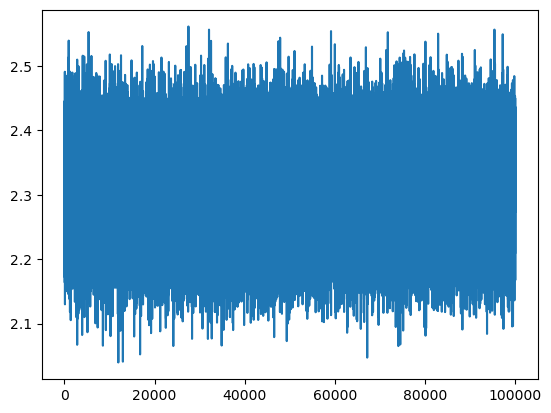

In [122]:
optimizer = torch.optim.AdamW(m.parameters(), lr=1e-3)

batch_size = 32

_losses = []
for step in tqdm(range(100000)):
    xb, yb = get_batch('train')

    logits, loss = m(xb, yb)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    _losses.append(loss.item())

pd.Series(_losses).plot();

In [127]:
idx = torch.zeros((1, 1), dtype=torch.long)
gentext = decode(m.generate(idx, max_new_tokens=1000)[0].tolist())
print(gentext)


 ka haja:
   oihe Kutalja;
  sepuheta,
 ven  Tulanian pa,
 Kuoit
  koisimänsihelan!
 Väkakui,
 Sävisvi
 sehonenieiluoi kanhopo
  Sikulaai en;
  kaosahtykanen,
 Yhe mo pisyörehili ka ksemaatusuomin tkavi s Luoipehähikipu llainullan:
   kitapoi epotanuakala   pen ve lan, Tun    ksanoikammo o koiskannä ssima  omasiavipa,
 mesakosin
 taveleläillota  ti!"
 pi et'  pon kuootivatet
 "Sa Sataa pii natttä,
 velätura!
 Miikoi,
 mema,
 ksisihasimmen.
 mä noalselka.
   Jo  Tonantami mareli hamän  tta pahoken ili "
 mikke,
 on ti!
  Tuva katuolosi ssenti
  "
   vilin,
 Akkin köhattellan ten lturenarelotäksenta, sehin ja kotarvän ta ei,
   sellatariluti  psä solenola   mäisi
   s!
 rjaha metohävatelelka polvinseistai nneläsa  t,
 vian Ve    kyhin "Poan;
 jaiänkäyhotaienka."
 tevait e, va "Kula.
 lea siturkaka siljaka ri, ki järkona,
 Syn siset en auontuuolanta,
 hä st Ahe   ja kinan käiiskonienen,
 ssolenten "En, otäesitti, keha  men Suutisisi jalaki ilaaheri   a  kii tualallellkuientohe
 Illlavet 